In [5]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import copy
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [6]:
folder = "../DATA/PROCESSED/standardized/"
y = 2
within = 3
sig = .01




In [7]:
cur_year_fname = "merged_kept_data_%iyrprev_within%i.csv"%(y,within)

df = pd.read_csv(folder + cur_year_fname, index_col=0)


df["apoe_4count"] = 0 * df[['apoe_genotype__22.0', 'apoe_genotype__23.0','apoe_genotype__33.0']].sum(axis=1) + \
                    1 * df[['apoe_genotype__24.0', 'apoe_genotype__34.0']].sum(axis=1) + \
                    2 * df['apoe_genotype__44.0']



DF_TO_CORR = df[df.columns[6:]]

to_check = ['onset_label_time_binary','age_at_visit','msex', 'educ','race__1.0', 'race__2.0', 'race__3.0',
            'race__6.0','spanish','apoe_4count', 'dcfdx__1.0', 'dcfdx__2.0', 'dcfdx__3.0',
            'cogn_ep', 'cogn_po', 'cogn_ps', 'cogn_se', 'cogn_wo','cogn_global',
            'med_con_sum_cum', 'vasc_3dis_sum', 'vasc_risks_sum', 'cancer_cum', 'claudication_cum',
            'diabetes_sr_rx','dm_cum','headinjrloc_cum', 'hypertension_cum','heart_cum', 'stroke_cum', 'thyroid_cum']

DF_TO_CORR = df[to_check]

corr_pvals = np.zeros([DF_TO_CORR.shape[1],DF_TO_CORR.shape[1]] )
pval_annot = np.empty([DF_TO_CORR.shape[1],DF_TO_CORR.shape[1]] ).astype(str)
pval_annot.fill("")
for i, c1 in enumerate(DF_TO_CORR.columns):
    for j, c2 in enumerate(DF_TO_CORR.columns):
        if i!=j:
            df_clean = DF_TO_CORR[[c1, c2]].dropna()
            c,p = pearsonr(df_clean[c1], df_clean[c2])
            corr_pvals[i,j] = p
            # bonferroni correction: multiply all p-values by (#variables)*(#variables-1)
            if p*len(DF_TO_CORR.columns)*(len(DF_TO_CORR.columns)-1)< sig:
                pval_annot[i,j]="*"

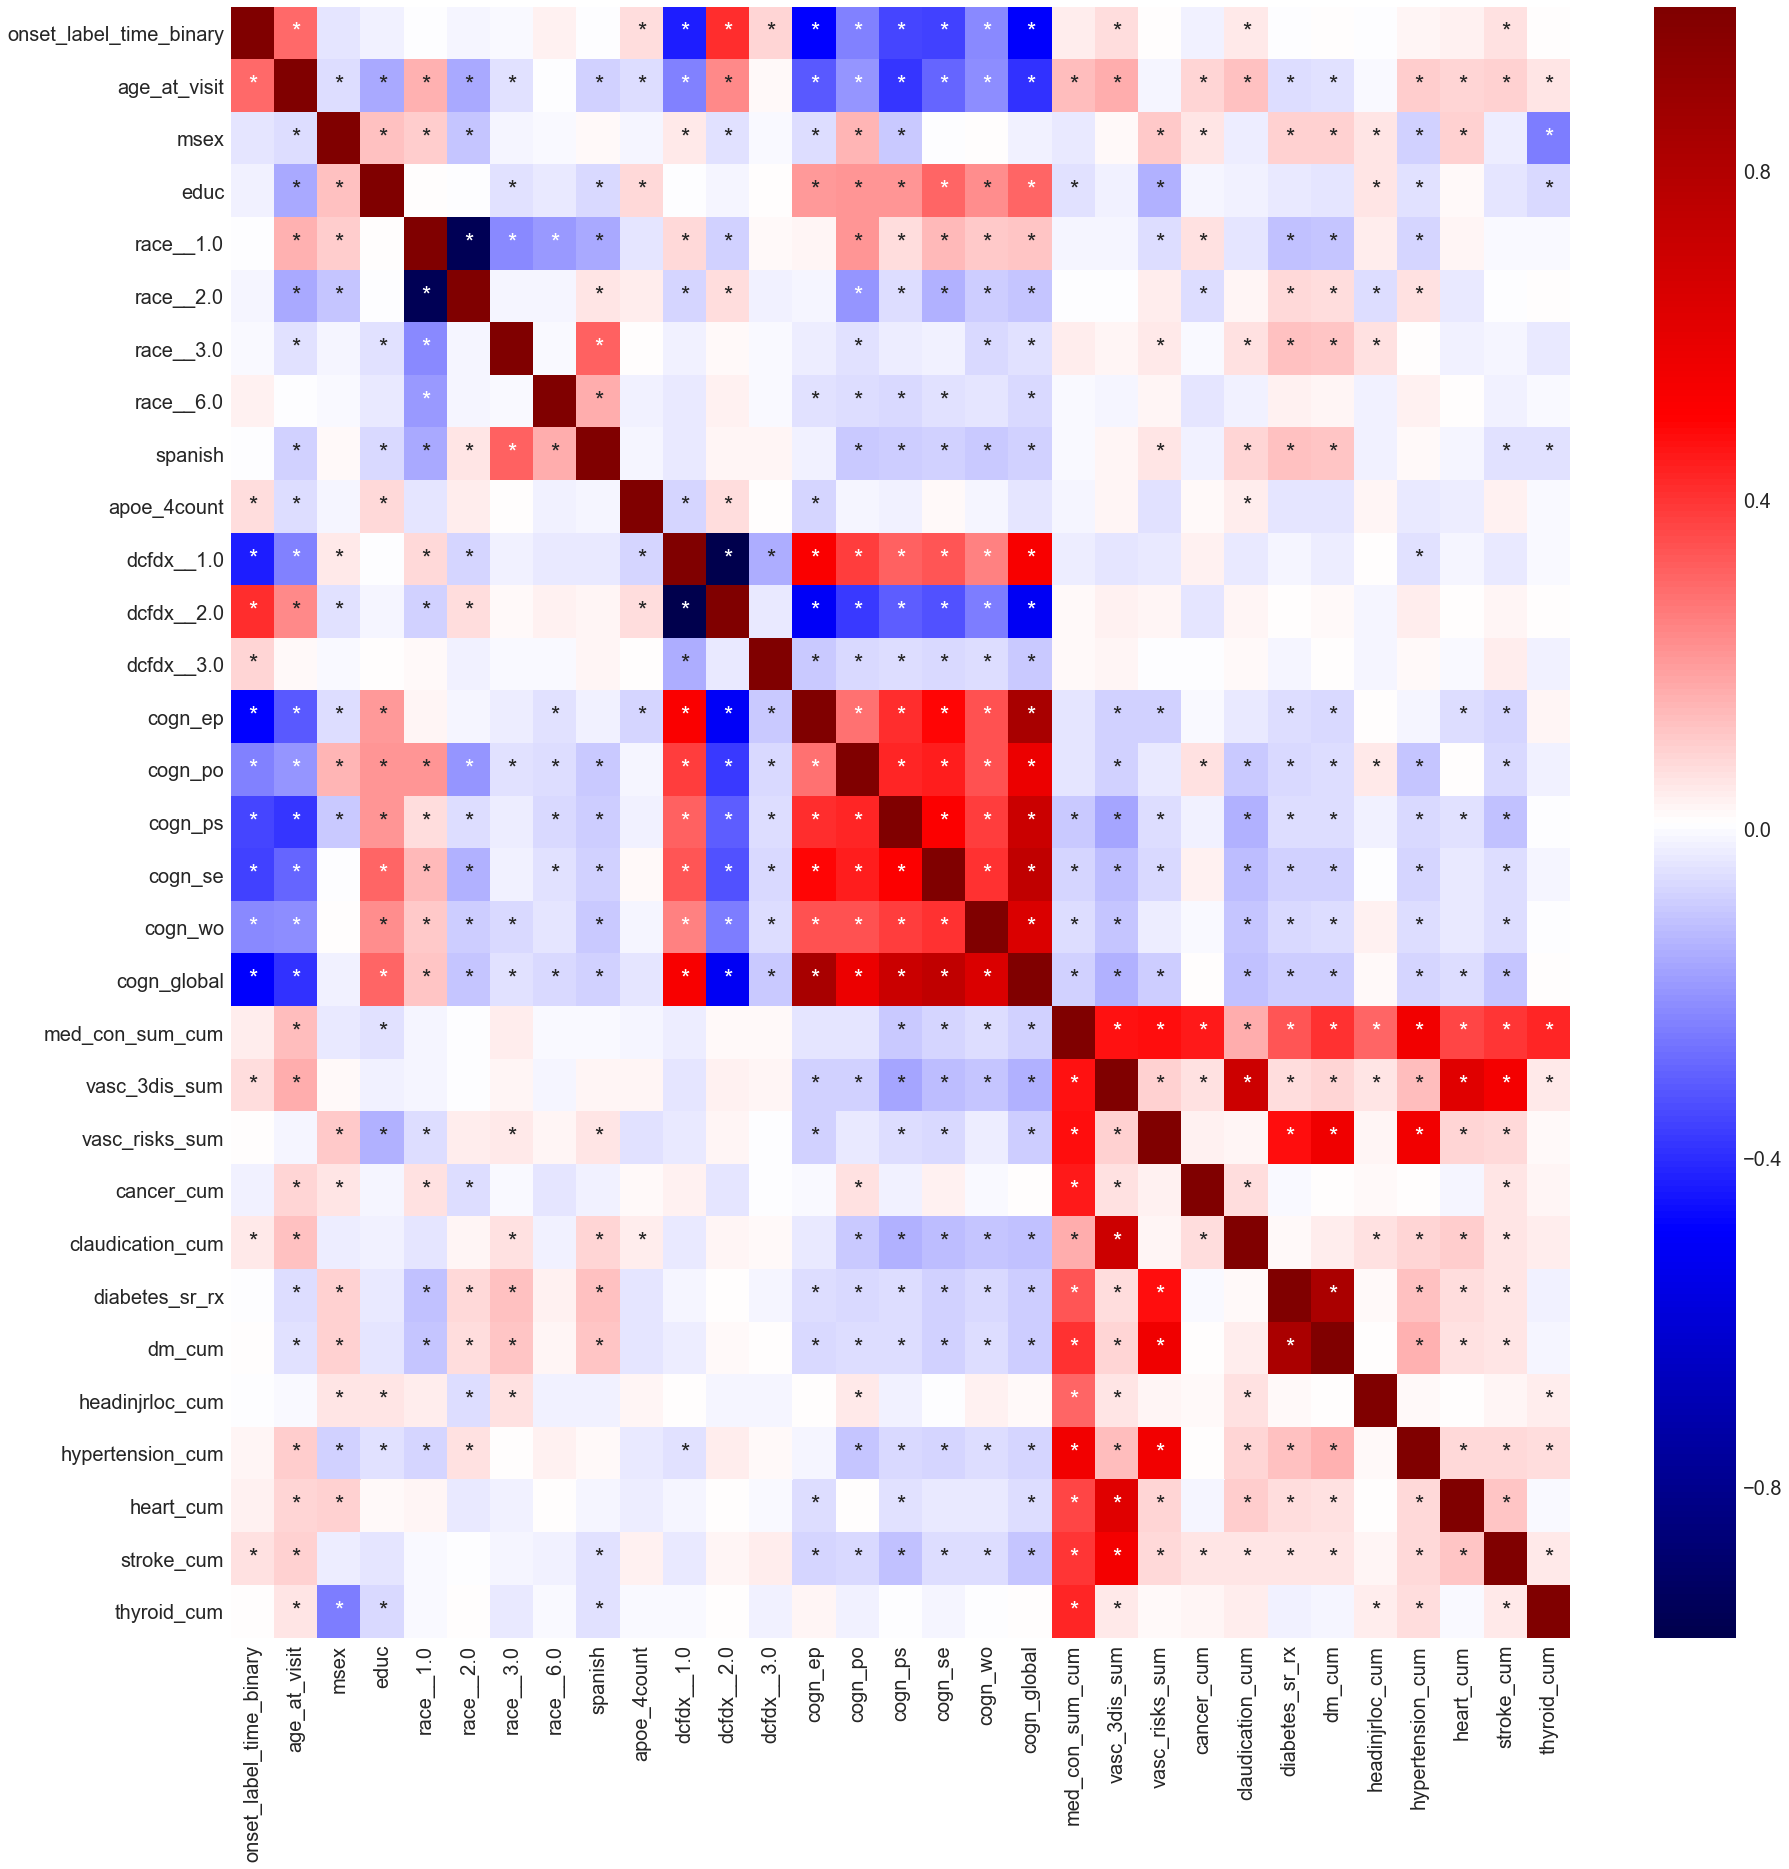

In [8]:
plt.figure(figsize=(30,30))
sns.set(font_scale = 2)

sns.heatmap(df[to_check].corr(), cmap="seismic", xticklabels=True, annot=pval_annot, fmt="s")